In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files 
import io

In [ ]:
uploaded = files.upload()

Saving interactions.xlsx to interactions (2).xlsx
Saving sales-pipeline.xlsx to sales-pipeline (1).xlsx


In [ ]:
interactions = pd.read_excel((uploaded['interactions.xlsx']))
sales = pd.read_excel((uploaded['sales-pipeline.xlsx']))


In [ ]:
interactions.info()
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316776 entries, 0 to 316775
Data columns (total 6 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   interactionID                    316776 non-null  int64         
 1   fromEmailId                      316776 non-null  object        
 2   toEmailId                        316776 non-null  object        
 3   InteractionDate                  316776 non-null  datetime64[ns]
 4   InteractionType(Call/Email/SMS)  316776 non-null  object        
 5   Extracted Interaction Text       316776 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 14.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Account            8800 non-null   obj

In [ ]:
interactions.head(5)

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam..."
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you


In [ ]:
sales.head(5)

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256


In [ ]:
train = sales[sales['Deal_Stage'] != 'In Progress']
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6711 entries, 0 to 8299
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Account            6711 non-null   object        
 1   Opportunity_ID     6711 non-null   object        
 2   Sales_Agent        6711 non-null   object        
 3   SalesAgentEmailID  6711 non-null   object        
 4   ContactEmailID     6711 non-null   object        
 5   Deal_Stage         6711 non-null   object        
 6   Product            6711 non-null   object        
 7   Close_Value        6711 non-null   int64         
 8   Created Date       6711 non-null   datetime64[ns]
 9   Close Date         6711 non-null   datetime64[ns]
 10  DateDiff           6711 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 629.2+ KB


In [ ]:
df1 = pd.merge(train, interactions, how='left', left_on=['SalesAgentEmailID','ContactEmailID'], right_on = ['fromEmailId','toEmailId'])

In [ ]:
df1.info()
df1.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704096 entries, 0 to 704095
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Account                          704096 non-null  object        
 1   Opportunity_ID                   704096 non-null  object        
 2   Sales_Agent                      704096 non-null  object        
 3   SalesAgentEmailID                704096 non-null  object        
 4   ContactEmailID                   704096 non-null  object        
 5   Deal_Stage                       704096 non-null  object        
 6   Product                          704096 non-null  object        
 7   Close_Value                      704096 non-null  int64         
 8   Created Date                     704096 non-null  datetime64[ns]
 9   Close Date                       704096 non-null  datetime64[ns]
 10  DateDiff                         704096 non-

Index(['Account', 'Opportunity_ID', 'Sales_Agent', 'SalesAgentEmailID',
       'ContactEmailID', 'Deal_Stage', 'Product', 'Close_Value',
       'Created Date', 'Close Date', 'DateDiff', 'interactionID',
       'fromEmailId', 'toEmailId', 'InteractionDate',
       'InteractionType(Call/Email/SMS)', 'Extracted Interaction Text'],
      dtype='object')

In [ ]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df1['Extracted Interaction Text'] = df1['Extracted Interaction Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df1['Extracted Interaction Text']

0         We writing GHF regarding previous discussions ...
1         I asked send progress project end last week I ...
2         I wish commend receptionist, Jany Dan, way han...
3         I need cancel appointment I made January 29, 9...
4         Congratulations! Your hard work paid off! Afte...
                                ...                        
704091    We writing GHF regarding previous discussions ...
704092    We approved proposal begin search 401(k) provi...
704093    hope best you. contributions product developme...
704094    I have'nt received updates though I asked spec...
704095    My last day manager MaXCorp two weeks Friday, ...
Name: Extracted Interaction Text, Length: 704096, dtype: object

In [ ]:
cols_use = ['Deal_Stage','Extracted Interaction Text']
df = df1[cols_use]

In [ ]:
df['Deal_Stage'] = df['Deal_Stage'].map({'Won':1,'Lost':0})
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704096 entries, 0 to 704095
Data columns (total 2 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Deal_Stage                  704096 non-null  int64 
 1   Extracted Interaction Text  704096 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.1+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
import sqlite3
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

In [ ]:
#train and test data
X = df['Extracted Interaction Text']
y = df['Deal_Stage']
X_Train, X_test, y_Train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)
X_train, X_cross, y_train, y_cross = train_test_split(X_Train, y_Train, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
#BOW(bag of words)
count= CountVectorizer()
count.fit(X_train)
Train_BOW = count.transform(X_train)
CrossVal_BOW = count.transform(X_cross)
Test_BOW= count.transform(X_test)

In [ ]:
#Logistic Regression model using Hyperparameter tuning and BOW vectorizers
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_BOW = []
CrossVal_AUC_BOW = []
for i in c:
  log_reg = LogisticRegression(C=i,max_iter=1000)
  log_reg.fit(Train_BOW, y_train)
  Train_y_pred =  log_reg.predict_proba(Train_BOW)[:,1]
  Train_AUC_BOW.append(roc_auc_score(y_train,Train_y_pred))
  CrossVal_y_pred =  log_reg.predict_proba(CrossVal_BOW)[:,1]
  CrossVal_AUC_BOW.append(roc_auc_score(y_cross,CrossVal_y_pred))

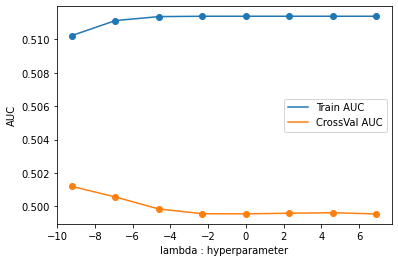

In [ ]:
C=[]
for i in range(len(c)):
  C.append(np.math.log(c[i]))
plt.plot(C, Train_AUC_BOW, label='Train AUC')
plt.scatter(C, Train_AUC_BOW)
plt.plot(C, CrossVal_AUC_BOW, label='CrossVal AUC')
plt.scatter(C, CrossVal_AUC_BOW)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.show()

In [ ]:
optimal_inverse_lambda=c[CrossVal_AUC_BOW.index(max(CrossVal_AUC_BOW))]
Classifier=LogisticRegression(C=optimal_inverse_lambda)
Classifier.fit(Train_BOW,y_train)
Train_FPR, Train_TPR, Thresholds = roc_curve(y_train, Classifier.predict_proba(Train_BOW)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(y_test, Classifier.predict_proba(Test_BOW)[:,1])

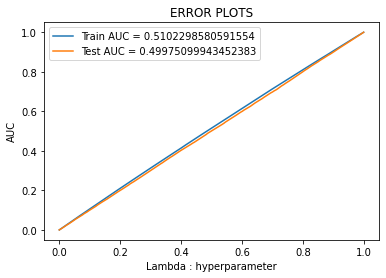

In [ ]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC = "+ str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC = "+ str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("Lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_pred = Classifier.predict(Test_BOW)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[    0, 52124],
       [    0, 88696]])

In [ ]:
accuracy_score(y_test, y_pred)

0.629853713961085

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     52124
           1       0.63      1.00      0.77     88696

    accuracy                           0.63    140820
   macro avg       0.31      0.50      0.39    140820
weighted avg       0.40      0.63      0.49    140820



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
feature_names = count.get_feature_names()
prob_sorted = sorted(zip(Classifier.coef_[0], feature_names))
print("Top 10 negative words")
print(prob_sorted[:10])
print("Top 10 positive words")
print(prob_sorted[:-(11):-1])

Top 10 negative words
[(-0.007535269062105677, 'closed'), (-0.007087400279066763, 'last'), (-0.006786751125838225, 'begin'), (-0.006633616646110296, 'business'), (-0.006444921130013076, 'thank'), (-0.006149943431408082, 'ideas'), (-0.005669448893670218, 'product'), (-0.005521573222611449, 'possible'), (-0.004950342950541432, 'deal'), (-0.0047636592940431014, 'best')]
Top 10 positive words
[(0.007888279675125946, 'price'), (0.006845323992185465, 'proposal'), (0.006313649684018803, 'sure'), (0.00621052502013555, 'mvc'), (0.006184074407606528, 'inform'), (0.005773988118589469, 'another'), (0.005640931000001101, 'hope'), (0.005312836660682099, 'please'), (0.005216086640172964, '000'), (0.004753530114574147, 'office')]


In [ ]:
#Considering other factors and text conversion
df1['Sales_Agent'].unique()

array(['Corliss Cosme', 'Rosalina Dieter', 'Donn Cantrell',
       'Wilburn Farren', 'Lajuana Vencill', 'Zane Levy',
       'Kary Hendrixson', 'Darcel Schlecht', 'Garret Kinder',
       'James Ascencio', 'Elease Gluck', 'Versie Hillebrand',
       'Maureen Marcano', 'Anna Snelling', 'Markita Hansen',
       'Vicki Laflamme', 'Marty Freudenburg', 'Gladys Colclough',
       'Violet Mclelland', 'Moses Frase', 'Rosie Papadopoulos',
       'Hayden Neloms', 'Jonathan Berthelot', 'Kami Bicknell',
       'Reed Clapper', 'Niesha Huffines', 'Cassey Cress',
       'Daniell Hammack', 'Cecily Lampkin', 'Boris Faz'], dtype=object)

In [ ]:
df1['Deal_Stage'] = df1['Deal_Stage'].map({'Won':1,'Lost':0})
ord_agents = df1.groupby('Sales_Agent')['Deal_Stage'].mean().sort_values()

In [ ]:
ord_agents = df1.groupby('Sales_Agent')['Deal_Stage'].mean().sort_values().index
ord_agents

Index(['Lajuana Vencill', 'Markita Hansen', 'Gladys Colclough',
       'Donn Cantrell', 'Niesha Huffines', 'Daniell Hammack', 'Elease Gluck',
       'Anna Snelling', 'Kary Hendrixson', 'Cassey Cress', 'Marty Freudenburg',
       'Zane Levy', 'Corliss Cosme', 'Darcel Schlecht', 'Violet Mclelland',
       'Vicki Laflamme', 'Kami Bicknell', 'James Ascencio',
       'Rosie Papadopoulos', 'Jonathan Berthelot', 'Moses Frase',
       'Garret Kinder', 'Boris Faz', 'Cecily Lampkin', 'Versie Hillebrand',
       'Reed Clapper', 'Rosalina Dieter', 'Maureen Marcano', 'Wilburn Farren',
       'Hayden Neloms'],
      dtype='object', name='Sales_Agent')

In [ ]:
#dictionary that maps each agent to the number
ordered_agents = {k:i for i, k in enumerate(ord_agents, 0)} 
ordered_agents

{'Anna Snelling': 7,
 'Boris Faz': 22,
 'Cassey Cress': 9,
 'Cecily Lampkin': 23,
 'Corliss Cosme': 12,
 'Daniell Hammack': 5,
 'Darcel Schlecht': 13,
 'Donn Cantrell': 3,
 'Elease Gluck': 6,
 'Garret Kinder': 21,
 'Gladys Colclough': 2,
 'Hayden Neloms': 29,
 'James Ascencio': 17,
 'Jonathan Berthelot': 19,
 'Kami Bicknell': 16,
 'Kary Hendrixson': 8,
 'Lajuana Vencill': 0,
 'Markita Hansen': 1,
 'Marty Freudenburg': 10,
 'Maureen Marcano': 27,
 'Moses Frase': 20,
 'Niesha Huffines': 4,
 'Reed Clapper': 25,
 'Rosalina Dieter': 26,
 'Rosie Papadopoulos': 18,
 'Versie Hillebrand': 24,
 'Vicki Laflamme': 15,
 'Violet Mclelland': 14,
 'Wilburn Farren': 28,
 'Zane Levy': 11}

In [ ]:
df1['Agents'] = df1.Sales_Agent.map(ordered_agents)

In [ ]:
df1['Product'].unique()

array(['GTX Plus Basic', 'MG Special', 'MG Advanced', 'GTX Basic',
       'GTXPro', 'GTX Plus Pro', 'GTK 500'], dtype=object)

In [ ]:
ord_products = df1.groupby('Product')['Deal_Stage'].mean().sort_values().index

In [ ]:
product_label = {k:i for i, k in enumerate(ord_products, 0)} 
product_label

{'GTK 500': 0,
 'GTX Basic': 4,
 'GTX Plus Basic': 2,
 'GTX Plus Pro': 5,
 'GTXPro': 3,
 'MG Advanced': 1,
 'MG Special': 6}

In [ ]:
df1['Product_Label'] = df1.Product.map(product_label)
cols_use = ['Agents', 'Deal_Stage', 'Product_Label', 'Close_Value','DateDiff','Extracted Interaction Text']
df2 = df1[cols_use]

In [ ]:
df2.head(10)

,Agents,Deal_Stage,Product_Label,Close_Value,DateDiff,Extracted Interaction Text
0,12,1,2,1255,141,We writing GHF regarding previous discussions ...
1,12,1,2,1255,141,I asked send progress project end last week I ...
2,12,1,2,1255,141,"I wish commend receptionist, Jany Dan, way han..."
3,12,1,2,1255,141,"I need cancel appointment I made January 29, 9..."
4,12,1,2,1255,141,Congratulations! Your hard work paid off! Afte...
5,12,1,2,1255,141,It gives immense pleasure write regard offer m...
6,12,1,2,1255,141,The business deal closed successfully
7,12,1,2,1255,141,Thank computer benchmarks produced Thorogood C...
8,12,1,2,1255,141,I pleased able discuss management plan. I meet...
9,12,1,2,1255,141,I considered carefully must decline offer posi...


In [ ]:
X = df2.drop('Deal_Stage', axis=1)
y = df2['Deal_Stage']
X_Train, X_test, y_Train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)
X_train, X_cross, y_train, y_cross = train_test_split(X_Train, y_Train, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
train=[]
for i in X_train['Agents']:
    train.append(i)
train_prdt=[]
for i in X_train['Product_Label']:
    train_prdt.append(i)
train_diff=[]
for i in X_train['DateDiff']:
    train_diff.append(i)
train_cval=[]
for i in X_train['Close_Value']:
    train_cval.append(i)

In [ ]:
cross=[]
for i in X_cross['Agents']:
    cross.append(i)
cross_prdt=[]
for i in X_cross['Product_Label']:
    cross_prdt.append(i)
cross_diff=[]
for i in X_cross['DateDiff']:
    cross_diff.append(i)
cross_cval=[]
for i in X_cross['Close_Value']:
    cross_cval.append(i)

In [ ]:
test=[]
for i in X_test['Agents']:
    test.append(i)
test_prdt=[]
for i in X_test['Product_Label']:
    test_prdt.append(i)
test_diff=[]
for i in X_test['DateDiff']:
    test_diff.append(i)
test_cval=[]
for i in X_test['Close_Value']:
    test_cval.append(i)

In [ ]:
#Stacking arrays in sequence horizontally 
Train_BOW_mix = (hstack((Train_BOW,np.array(train)[:,None], np.array(train_prdt)[:,None], np.array(train_diff)[:,None], np.array(train_cval)[:,None]))).tocsr()

Cross_BOW_mix = (hstack((CrossVal_BOW,np.array(cross)[:,None], np.array(cross_prdt)[:,None], np.array(cross_diff)[:,None], np.array(cross_cval)[:,None]))).tocsr()

Test_BOW_mix = (hstack((Test_BOW,np.array(test)[:,None], np.array(test_prdt)[:,None], np.array(test_diff)[:,None], np.array(test_cval)[:,None]))).tocsr()

In [ ]:
#Model using Text + Other numeric Features

c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_BOW = []
CrossVal_AUC_BOW = []
for i in c:
  log_reg = LogisticRegression(C=i,max_iter=1000)
  logreg.fit(Train_BOW_mix, y_train)
  Train_y_pred =  logreg.predict_proba(Train_BOW_mix)[:,1]
  Train_AUC_BOW.append(roc_auc_score(y_train,Train_y_pred))
  CrossVal_y_pred =  logreg.predict_proba(Cross_BOW_mix)[:,1]
  CrossVal_AUC_BOW.append(roc_auc_score(y_cross,CrossVal_y_pred))

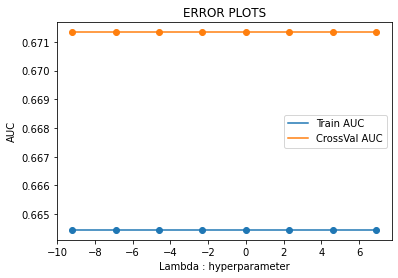

In [ ]:
C=[]
for i in range(len(c)):
  C.append(np.math.log(c[i]))
plt.plot(C, Train_AUC_BOW, label='Train AUC')
plt.scatter(C, Train_AUC_BOW)
plt.plot(C, CrossVal_AUC_BOW, label='CrossVal AUC')
plt.scatter(C, CrossVal_AUC_BOW)
plt.legend()
plt.xlabel("Lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
optimal_inverse_lambda=c[CrossVal_AUC_BOW.index(max(CrossVal_AUC_BOW))]
optimal_inverse_lambda


0.0001

In [ ]:
Classifier=LogisticRegression(C=optimal_inverse_lambda)
Classifier.fit(Train_BOW_mix,y_train)
Train_FPR, Train_TPR, Thresholds = roc_curve(y_train, Classifier.predict_proba(Train_BOW_mix)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(y_test, Classifier.predict_proba(Test_BOW_mix)[:,1])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


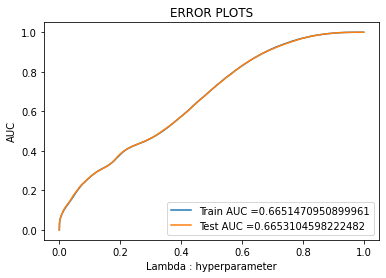

In [ ]:

plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("Lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_pred = Classifier.predict(Test_BOW_mix)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[10324, 41800],
       [ 2632, 86064]])

In [ ]:
accuracy_score(y_test, y_pred)

0.6844766368413577

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.20      0.32     52124
           1       0.67      0.97      0.79     88696

    accuracy                           0.68    140820
   macro avg       0.73      0.58      0.56    140820
weighted avg       0.72      0.68      0.62    140820



In [ ]:
feature_names = count.get_feature_names()
prob_sorted = sorted(zip(Classifier.coef_[0], feature_names))
print("Top 20 negative class words")
print(prob_sorted[:20])
print("Top 20 positive class words")
print(prob_sorted[:-(21):-1])

Top 10 negative class words
[(-0.04159998613075136, 'time'), (-0.030198513556402438, 'product'), (-0.026878776608051855, 'meet'), (-0.022603549148584628, 'thank'), (-0.02257272515577452, 'deal'), (-0.0218711024348352, 'position'), (-0.02055060585628972, 'sorry'), (-0.02007911333851044, 'inform'), (-0.019534334646978582, 'need'), (-0.019105712668859406, 'you'), (-0.01864479551485809, 'must'), (-0.01855016626850373, 'it'), (-0.01754250325798072, 'last'), (-0.01677738775463704, 'the'), (-0.016449136792834336, 'conference'), (-0.016401900393076665, 'accept'), (-0.016250579638884172, 'new'), (-0.016028717627576974, 'closed'), (-0.015784188671514706, 'us'), (-0.015373545357033024, 'staff')]
Top 10 positive class words
[(0.0071024325171389294, 'looking'), (0.006863244968808157, 'conduct'), (0.0064321235934197, 'accepted'), (0.005898066809459864, 'marketing'), (0.005655851153273632, 'reply'), (0.0055783443627135205, 'others'), (0.00544591215611976, 'proposal'), (0.004324220774137665, 'know'), 